# **Data Diri**
Nama : Ardian Nurcahya \\
Email : ardian.a1gca@gmail.com \\
Domisili : Bandung \\
Tempat, Tanggal Lahir : Bandung, 20 januari 2002 \\
Profesi saat ini : Mahasiswa \\
Institusi : Universitas Padjadjaran \\



# Membuat model NLP

### 1. Import Pustaka yang digunakan

In [2]:

import os
import tensorflow as tf
import pandas as pd
import nltk
import matplotlib.pyplot as plt
from google.colab import drive
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize, RegexpTokenizer
nltk.download('stopwords')
nltk.download('punkt')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

### 2. Menghubungkan kaggle dengan google drive

In [4]:
# Menginstall Kaggle
!pip install kaggle

# mount gdrive dan mengubah environment direktori
drive.mount('/content/gdrive')
os.environ['KAGGLE_CONFIG_DIR'] = "/content/gdrive/MyDrive/Kaggle"
%cd /content/gdrive/My Drive/Kaggle

Mounted at /content/gdrive
/content/gdrive/My Drive/Kaggle


In [6]:
#Mengunduh dan mengekstrak Dataset
!kaggle datasets download -d abdallahwagih/emotion-dataset
!unzip \*.zip && rm *.zip

  0% 0.00/213k [00:00<?, ?B/s]
100% 213k/213k [00:00<00:00, 24.1MB/s]
Archive:  emotion-dataset.zip
  inflating: Emotion_classify_Data.csv  


### 3. Membaca dataset

In [7]:
df = pd.read_csv('Emotion_classify_Data.csv', delimiter=',')

# menentukan jumlah data, kelas, kelas unik
jumlah_kelas = df['Emotion'].nunique()
kelas_unik = df['Emotion'].unique()

print(df.columns)
print(f'Jumlah Data: {len(df)}')
print(f"Jumlah Kelas: {jumlah_kelas}")
print(f"Kelas Unik: {kelas_unik}")

# mengubah setiap kelas menjadi kolom baru
category = pd.get_dummies(df.Emotion)
df_baru = pd.concat([df, category], axis=1)
df_baru = df_baru.drop(columns='Emotion')
df_baru

Index(['Comment', 'Emotion'], dtype='object')
Jumlah Data: 5937
Jumlah Kelas: 3
Kelas Unik: ['fear' 'anger' 'joy']


Comment  anger  fear  joy
0     i seriously hate one subject to death but now ...      0     1    0
1                    im so full of life i feel appalled      1     0    0
2     i sit here to write i start to dig out my feel...      0     1    0
3     ive been really angry with r and i feel like a...      0     0    1
4     i feel suspicious if there is no one outside l...      0     1    0
...                                                 ...    ...   ...  ...
5932                 i begun to feel distressed for you      0     1    0
5933  i left feeling annoyed and angry thinking that...      1     0    0
5934  i were to ever get married i d have everything...      0     0    1
5935  i feel reluctant in applying there because i w...      0     1    0
5936  i just wanted to apologize to you because i fe...      1     0    0

[5937 rows x 4 columns]

### 4. Text preprocessing

In [8]:
# Tokenisasi dan hapus stop words
stop_words = set(stopwords.words('english'))
df_baru['Comment'] = df_baru['Comment'].apply(lambda x: ' '.join([word.lower() for word in word_tokenize(str(x)) if word.isalpha() and word.lower() not in stop_words]))

# Tokenizer untuk menghapus tanda baca
tokenizer = RegexpTokenizer(r'\b\w+\b')  # Hanya kata-kata alfanumerik

# Tokenisasi dan hapus tanda baca
df_baru['Comment'] = df_baru['Comment'].apply(lambda x: ' '.join(tokenizer.tokenize(x)))

### 5. Membagi data menjadi 80% training dan 20% validation

In [9]:
# Mengubah teks menjadi Numpy Array
review = df_baru['Comment'].values
label = df_baru[['anger', 'fear', 'joy']].values

# Membagi data
review_train, review_test, label_latih, label_test = train_test_split(review, label, test_size=0.2, random_state=42)

### 6. Tokenizer dan menambahkan pad_sequens

In [10]:
# Tokenisasi sebanyak 8000 kata
tokenizer = Tokenizer(num_words=8000, oov_token='-')
tokenizer.fit_on_texts(review_train)
print(tokenizer.word_index)

# Mengubah kalimat di teks dalam bentuk token
sekuens_latih = tokenizer.texts_to_sequences(review_train)
sekuens_test = tokenizer.texts_to_sequences(review_test)

# Proses padding untuk menyamaratakan panjang data
padded_latih = pad_sequences(sekuens_latih, padding='post', maxlen=33, truncating='post')
padded_test = pad_sequences(sekuens_test, padding='post', maxlen=33, truncating='post')

{'-': 1, 'feel': 2, 'feeling': 3, 'like': 4, 'im': 5, 'know': 6, 'really': 7, 'little': 8, 'time': 9, 'get': 10, 'people': 11, 'want': 12, 'would': 13, 'even': 14, 'bit': 15, 'still': 16, 'one': 17, 'think': 18, 'make': 19, 'ive': 20, 'dont': 21, 'something': 22, 'could': 23, 'going': 24, 'way': 25, 'life': 26, 'things': 27, 'much': 28, 'day': 29, 'back': 30, 'go': 31, 'around': 32, 'love': 33, 'also': 34, 'need': 35, 'see': 36, 'good': 37, 'always': 38, 'right': 39, 'feels': 40, 'work': 41, 'cant': 42, 'pretty': 43, 'today': 44, 'felt': 45, 'less': 46, 'got': 47, 'say': 48, 'help': 49, 'enough': 50, 'feelings': 51, 'though': 52, 'someone': 53, 'well': 54, 'agitated': 55, 'makes': 56, 'getting': 57, 'sure': 58, 'angry': 59, 'didnt': 60, 'away': 61, 'never': 62, 'made': 63, 'every': 64, 'lot': 65, 'quite': 66, 'strange': 67, 'cold': 68, 'person': 69, 'afraid': 70, 'nervous': 71, 'find': 72, 'actually': 73, 'anxious': 74, 'ever': 75, 'happy': 76, 'many': 77, 'take': 78, 'sometimes': 79, 

### 7. Membuat model sequential

In [20]:
# Pembuatan model (LSTM, Embedding, Dropout)
model = tf.keras.Sequential([
    Embedding(input_dim=8000, output_dim=13),
    LSTM(64,dropout=0.2,recurrent_dropout=0.3),
    Dense(128, activation='relu'),
    Dropout(0.2),
    Dense(64, activation='relu'),
    Dropout(0.3),
    Dense(3, activation='softmax')
])

# summary dan compiling model
model.summary()
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_2 (Embedding)     (None, None, 13)          104000    
                                                                 
 lstm_2 (LSTM)               (None, 64)                19968     
                                                                 
 dense_6 (Dense)             (None, 128)               8320      
                                                                 
 dropout_4 (Dropout)         (None, 128)               0         
                                                                 
 dense_7 (Dense)             (None, 64)                8256      
                                                                 
 dropout_5 (Dropout)         (None, 64)                0         
                                                                 
 dense_8 (Dense)             (None, 3)                

### 8. Pelatihan model machine learning

In [21]:
# Penggunaan threshold val accuracy untuk callbacks
akurasi_yang_ditentukan = 0.92

#membuat class untuk menghentikan pelatihan jika threshold tercapai
class CustomEarlyStopping(EarlyStopping):
    def on_epoch_end(self, epoch, logs=None):
        akurasi_saat_ini = logs.get('val_accuracy')
        if akurasi_saat_ini >= akurasi_yang_ditentukan:
            print(f"\nval accuracy mencapai ({akurasi_yang_ditentukan}), pelatihan telah berhenti.")
            #menyimpan model
            model.save('NLP_emotion_model.h5')
            #menghentikan pelatihan
            self.model.stop_training = True
        else:
            super().on_epoch_end(epoch, logs)

custom_early_stopping = CustomEarlyStopping(monitor='val_accuracy', patience=40, mode='max', verbose=1)

#Pelatihan model
history = model.fit(padded_latih,
                    label_latih,
                    epochs=50,
                    batch_size=128,
                    callbacks = [custom_early_stopping],
                    validation_data=(padded_test, label_test), verbose=2)

Epoch 1/50
75/75 - 12s - loss: 1.0991 - accuracy: 0.3380 - val_loss: 1.1001 - val_accuracy: 0.3199 - 12s/epoch - 158ms/step
Epoch 2/50
75/75 - 5s - loss: 1.0987 - accuracy: 0.3373 - val_loss: 1.0999 - val_accuracy: 0.3199 - 5s/epoch - 60ms/step
Epoch 3/50
75/75 - 7s - loss: 1.0984 - accuracy: 0.3418 - val_loss: 1.1000 - val_accuracy: 0.3199 - 7s/epoch - 94ms/step
Epoch 4/50
75/75 - 4s - loss: 1.0984 - accuracy: 0.3418 - val_loss: 1.1000 - val_accuracy: 0.3199 - 4s/epoch - 60ms/step
Epoch 5/50
75/75 - 5s - loss: 1.0984 - accuracy: 0.3394 - val_loss: 1.1005 - val_accuracy: 0.3300 - 5s/epoch - 61ms/step
Epoch 6/50
75/75 - 7s - loss: 0.9986 - accuracy: 0.4277 - val_loss: 0.6704 - val_accuracy: 0.6002 - 7s/epoch - 94ms/step
Epoch 7/50
75/75 - 5s - loss: 0.6245 - accuracy: 0.6250 - val_loss: 0.5896 - val_accuracy: 0.6372 - 5s/epoch - 61ms/step
Epoch 8/50
75/75 - 5s - loss: 0.5344 - accuracy: 0.6486 - val_loss: 0.5894 - val_accuracy: 0.6347 - 5s/epoch - 61ms/step
Epoch 9/50
75/75 - 7s - loss:

### 9. Mendapatkan akurasi model dan membuat plot

In [23]:
test_loss, test_accuracy = model.evaluate(padded_test, label_test)
training_accuracy = history.history['accuracy']
# Menampilkan hasil akurasi training dan test
print(f"Training Accuracy: {round(training_accuracy[-1],2)*100} %")
print(f'Test Accuracy: {round(test_accuracy*100,2)} %')

38/38 [==============================] - 1s 15ms/step - loss: 0.3610 - accuracy: 0.9217
Training Accuracy: 99.0 %
Test Accuracy: 92.17 %


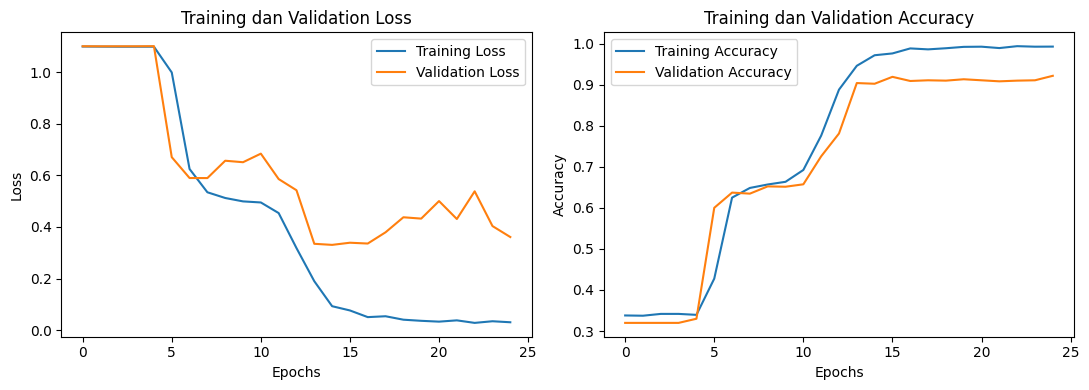

In [24]:
# Membuat Plot kurva loss
plt.figure(figsize=(11,4))
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training dan Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

# Membuat Plot kurva akurasi
plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training dan Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

# Menampilkan plot
plt.tight_layout()  # Untuk memberikan padding yang memadai antara subplot
plt.show()
